In [1]:
using Distributions, StatsBase

In [10]:
data = rand(Normal(),500);

In [11]:
my_df = ecdf(data)

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}([-3.741857542610632, -2.696096035087575, -2.332754901506785, -2.299493723251969, -2.232033116070314, -2.210443399694192, -2.1150063319567467, -1.9664913838874376, -1.8957286952046746, -1.8799306043216035  …  2.4289638416511123, 2.439351475960871, 2.448905823641396, 2.461976663133805, 2.474909364019686, 2.5901266151373292, 2.638969311761757, 2.6612809319074824, 3.095987217368619, 3.3681998877891366], Float64[])

In [12]:
my_df(-24.3)

0.0

In [13]:
my_df(3532.4)

1.0

In [14]:
my_df.([.5,35])

2-element Vector{Float64}:
 0.714
 1.0

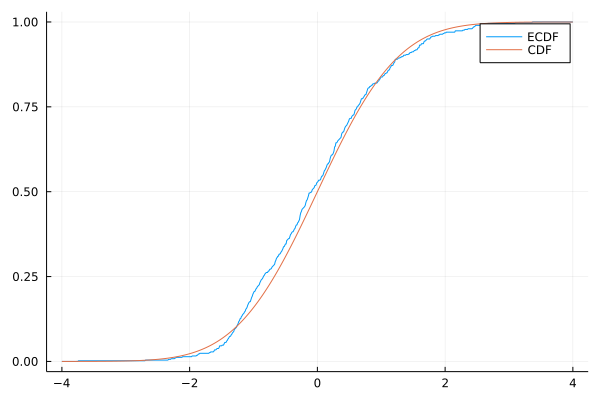

In [19]:
using Plots
x_grid = -4:0.01:4
plot(x_grid, my_df.(x_grid),label="ECDF")
plot!(x_grid, cdf.(Normal(),x_grid),label="CDF")

In [21]:
data2 = rand(Logistic(),500);

In [23]:
my_df2 = ecdf(data2);

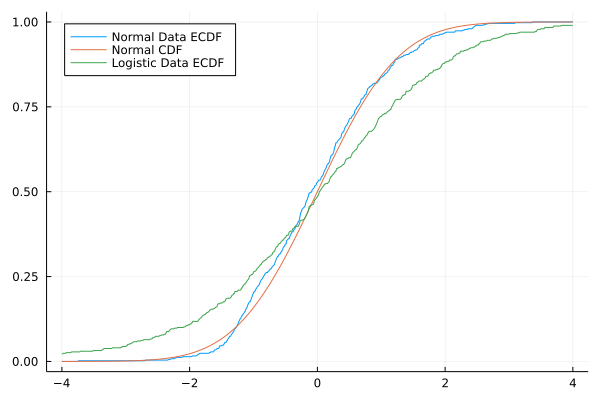

In [25]:
using Plots
x_grid = -4:0.01:4
plot(x_grid, my_df.(x_grid),label="Normal Data ECDF")
plot!(x_grid, cdf.(Normal(),x_grid),label="Normal CDF")
plot!(x_grid, my_df2.(x_grid),label="Logistic Data ECDF",legend=:topleft)

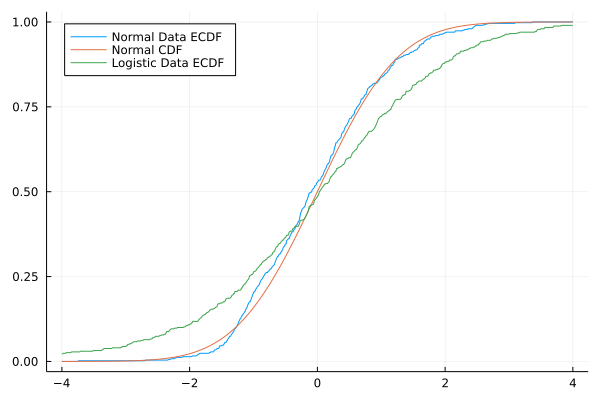

In [26]:
using Plots
x_grid = -4:0.01:4

#Notice!!!! No commas in the [ ]
plot(x_grid, 
    [my_df.(x_grid) cdf.(Normal(),x_grid) my_df2.(x_grid)],
    label=["Normal Data ECDF" "Normal CDF" "Logistic Data ECDF"],legend=:topleft)

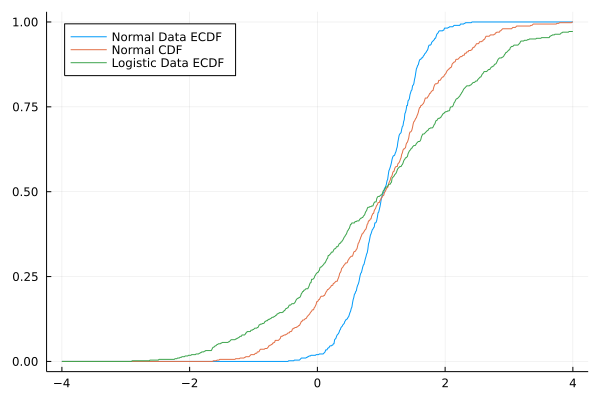

In [38]:
#Notice!!!! No commas in the [ ]

σ_vals = [0.5, 1.0, 1.5];

data_collection = [rand(Normal(1,σ),500) for σ in σ_vals]
ecdfs = ecdf.(data_collection)

# Alternativly...
# ecdfs = []
# for i in 1:length(σ_vals)
#     push!(ecdfs,ecdf(data_collection[i]))
# end

plot(x_grid, 
    hcat([df.(x_grid) for df in ecdfs]...),
    label=["Normal Data ECDF" "Normal CDF" "Logistic Data ECDF"],legend=:topleft)